# GMU ECE 527 - Computer Exercise #2 - Code
**Stewart Schuler - G01395779**\
**20240912**

Global imports and define PLA functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

def perceptron_sgd(X, y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 20
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*y[i]) <= 0:
                w = w + eta*X[i]*y[i]
    return w
                
def perceptron_sgd_pocket(X, y):
    w = np.zeros(len(X[0]))
    w_pocket = w
    pocket_score = 0
    eta = 1
    epochs = 20
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*y[i]) <= 0:
                w = w + eta*X[i]*y[i]
                tmp_score = perceptron_eval(X,y,w)
                if(  tmp_score > pocket_score ):
                    pocket_score = tmp_score
                    w_pocket = w
    return w_pocket
                
def perceptron_eval(X,y,w):
    num_correct = 0
    for ii in range(X.shape[0]):
        if (np.dot(X[ii],w)*y[ii]) > 0:
            num_correct+=1
    return num_correct/X.shape[0]
    

Generate separable test dataset

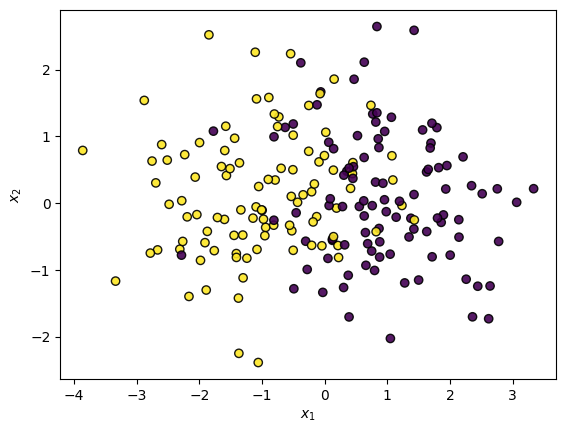

In [2]:
# Set random seed
np.random.seed(5)

# Generate Two class gausian data
N = int(200)
X = np.zeros((N,2))
X[0:int(N/2):1, 0:2:1] = np.random.normal([-1,0], [1,1], (int(N/2),2)) #X Class -1
X[int(N/2):N:1, 0:2:1] = np.random.normal([1,0], [1,1], (int(N/2),2)) #X Class 1
y = np.zeros((N,1))
y[0:int(N/2):1,:] = 1
y[int(N/2):N:1,:] = -1

# Randomize data order
rand_perm = np.random.permutation(N)
X = X[rand_perm]
y = y[rand_perm]

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, edgecolors='black')


Run SGD and Pocket and Plot result boundary

Text(0, 0.5, '$x_2$')

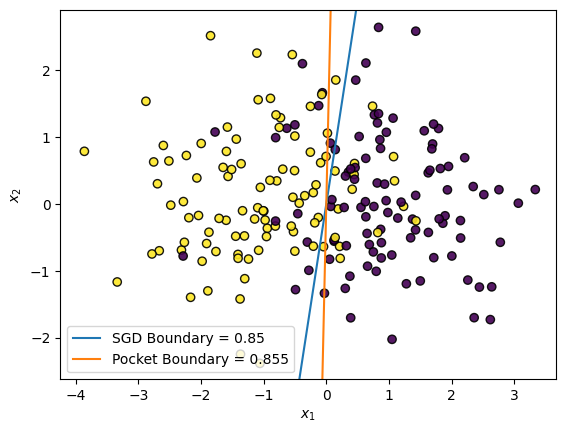

In [3]:
w = perceptron_sgd(X, y)
slope = -(w[0])/(w[1])

x_min = min(X[:,0])
x_max = max(X[:,0])

w_pocket = perceptron_sgd_pocket(X, y)
slope_pocket = -(w_pocket[0])/(w_pocket[1])

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, edgecolors='black')
plt.plot( [x_min, x_max], [slope*x_min,slope*x_max], label=f"SGD Boundary = {perceptron_eval(X,y,w)}")
plt.plot( [x_min, x_max], [slope_pocket*x_min,slope_pocket*x_max], label=f"Pocket Boundary = {perceptron_eval(X,y,w_pocket)}")
plt.legend()
plt.xlim([x_min*1.1,x_max*1.1])
plt.ylim([min(X[:,1])*1.1,max(X[:,1])*1.1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


Run SGD and Pocket and Plot result boundary for a data set with an offset

Text(0, 0.5, '$x_2$')

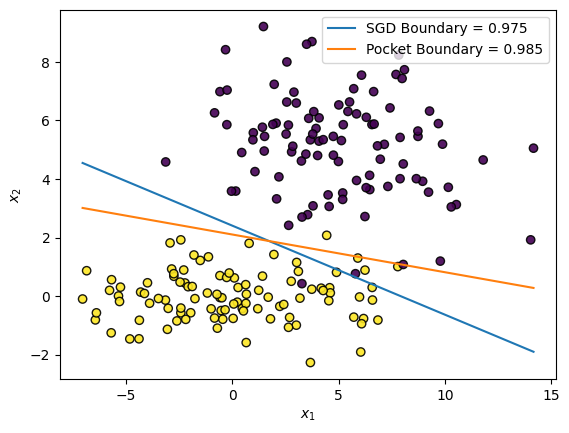

In [4]:
# Generate Two class gausian data
N = int(200)
X = np.zeros((N,3))
X[0:N:1, 0] = 1
X[0:int(N/2):1, 1:3:1] = np.random.normal([0,0], [4,1], (int(N/2),2)) #X Class -1
X[int(N/2):N:1, 1:3:1] = np.random.normal([5,5], [3,2], (int(N/2),2)) #X Class 1
y = np.zeros((N,1))
y[0:int(N/2):1,:] = 1
y[int(N/2):N:1,:] = -1

# Randomize data order
rand_perm = np.random.permutation(N)
X = X[rand_perm]
y = y[rand_perm]

w = perceptron_sgd(X, y)
slope = -(w[1])/(w[2])
inter = -w[0]/w[2]

w_pocket = perceptron_sgd_pocket(X, y)
slope_pocket = -(w_pocket[1])/(w_pocket[2])
inter_pocket = -w_pocket[0]/w_pocket[2]

x_min = min(X[:,1])
x_max = max(X[:,1])

plt.scatter(X[:, 1], X[:, 2], c=y, alpha=0.9, edgecolors='black')
plt.plot( [x_min, x_max], inter + [slope*x_min,slope*x_max], label=f"SGD Boundary = {perceptron_eval(X,y,w)}")
plt.plot( [x_min, x_max], inter_pocket + [slope_pocket*x_min,slope_pocket*x_max], label=f"Pocket Boundary = {perceptron_eval(X,y,w_pocket)}")
plt.legend()
#plt.xlim([x_min*1.1,x_max*1.1])
#plt.ylim([min(X[:,2])*1.1,max(X[:,2])*1.1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


Create Dataset 1

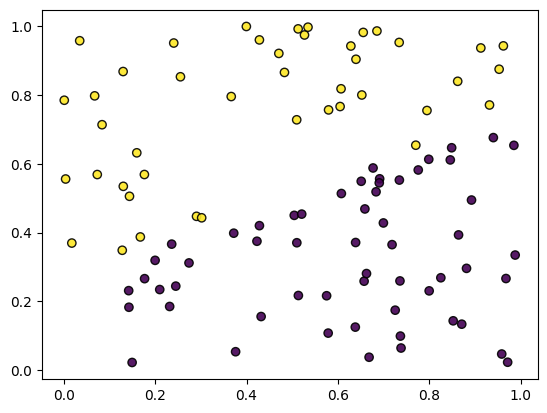

In [5]:
import numpy as np

N = 100
X1 = np.random.rand(N,2)
y1 = (-0.5*X1[:,0] + X1[:,1] - 0.25 > 0).astype(int)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, alpha=0.9, edgecolors='black')

Create Dataset 2

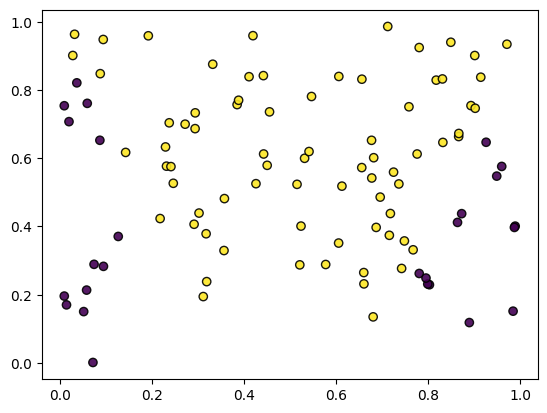

In [6]:
N = 100
X2 = np.random.rand(N,2)
y2 = (X2[:,1] > 4*(X2[:,0] -0.5)**2).astype(int)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, alpha=0.9, edgecolors='black')

Create Dataset 3

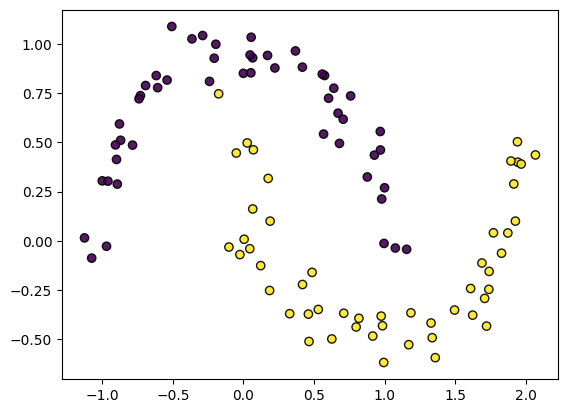

In [7]:
from sklearn.datasets import make_moons
X3, y3 = make_moons(N,noise=0.1)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, alpha=0.9, edgecolors='black')

Create Dataset 4

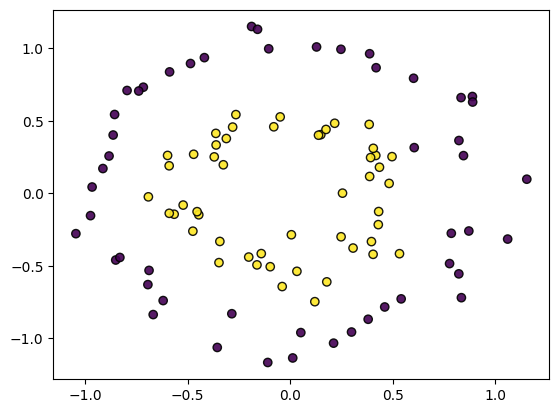

In [8]:
from sklearn.datasets import make_circles
X4, y4 = make_circles(N,noise=0.1, factor=0.5)
plt.scatter(X4[:, 0], X4[:, 1], c=y4, alpha=0.9, edgecolors='black')

Question: Does PLA work with y=0/1. Or do they need to be converted to -1/1? Does perceptron care?\
PLA with $y \in [0,1]$

Text(0.5, 1.0, 'PLA With y1 [0,1]')

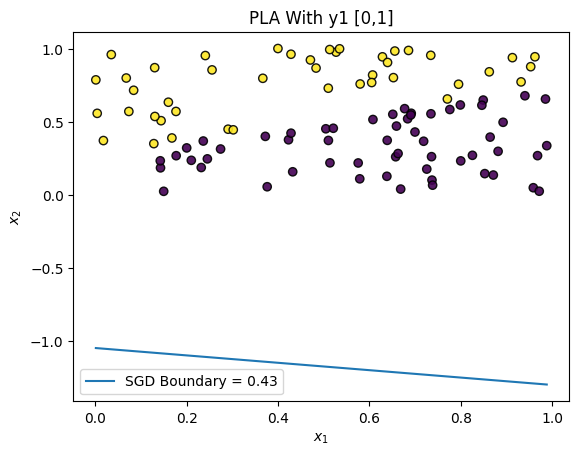

In [9]:
X1_pla = np.zeros((N,3))
X1_pla[:,0] = 1
X1_pla[:,1:3] = X1.copy();

w = perceptron_sgd(X1_pla, y1)
slope = -(w[1])/(w[2])
inter = -w[0]/w[2]

x_min = min(X1_pla[:,1])
x_max = max(X1_pla[:,1])

plt.scatter(X1_pla[:, 1], X1_pla[:, 2], c=y1, alpha=0.9, edgecolors='black')
plt.plot( [x_min, x_max], inter + [slope*x_min,slope*x_max], label=f"SGD Boundary = {perceptron_eval(X1_pla,y1,w)}")
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("PLA With y1 [0,1]")


PLA with $y \in [-1,1]$

Text(0.5, 1.0, 'PLA With y1 [-1,1]')

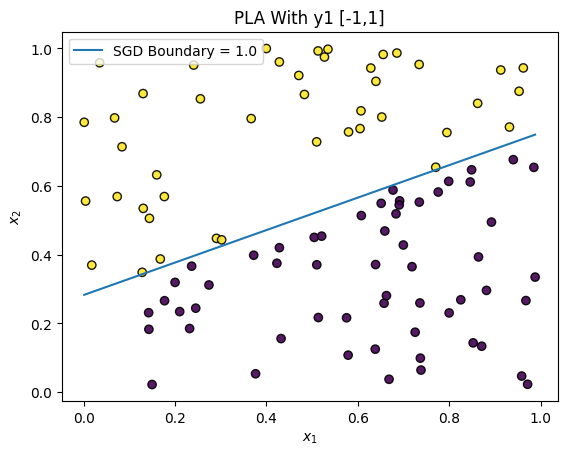

In [10]:

y1_m1 = y1.copy()
y1_m1[np.where(y1_m1==0)[0]] = -1

w = perceptron_sgd(X1_pla, y1_m1)
slope = -(w[1])/(w[2])
inter = -w[0]/w[2]

x_min = min(X1_pla[:,1])
x_max = max(X1_pla[:,1])

plt.scatter(X1_pla[:, 1], X1_pla[:, 2], c=y1_m1, alpha=0.9, edgecolors='black')
plt.plot( [x_min, x_max], inter + [slope*x_min,slope*x_max], label=f"SGD Boundary = {perceptron_eval(X1_pla,y1_m1,w)}")
plt.legend()

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("PLA With y1 [-1,1]")


Perceptron with $y \in [0,1]$ Same parameters

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Text(0.5, 1.0, 'PLA With y1 [0,1]')

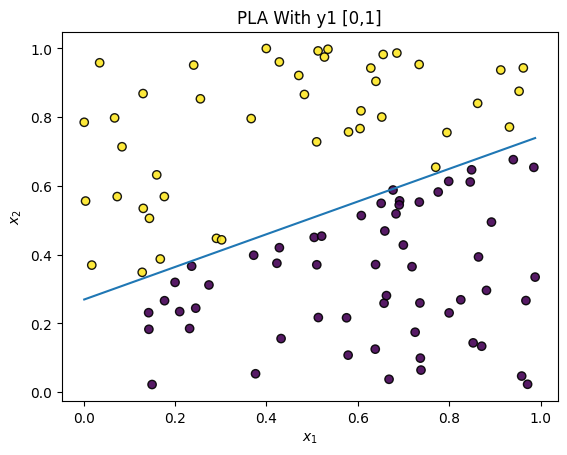

In [11]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=True, eta0=1, max_iter=20, n_iter_no_change=20 )
clf.fit(X1,y1)

w = clf.coef_[0]
w = np.array([clf.intercept_[0],w[0],w[1]])
slope = -(w[1])/(w[2])
inter = -w[0]/w[2]

x_min = min(X1[:,0])
x_max = max(X1[:,0])

plt.scatter(X1[:, 0], X1[:, 1], c=y1, alpha=0.9, edgecolors='black')
plt.plot( [x_min, x_max], inter + [slope*x_min,slope*x_max])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("PLA With y1 [0,1]")

Perceptron with $y \in [-1,1]$ Same parameters

/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Text(0.5, 1.0, 'PLA With y1 [-1,1]')

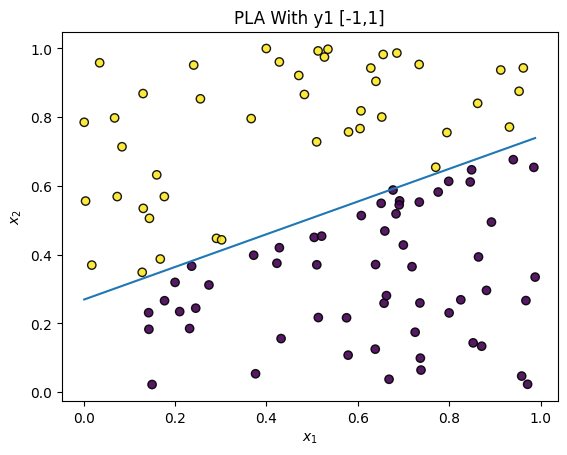

In [12]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=True, eta0=1, max_iter=20, n_iter_no_change=20 )
clf.fit(X1,y1_m1)

w = clf.coef_[0]
w = np.array([clf.intercept_[0],w[0],w[1]])
slope = -(w[1])/(w[2])
inter = -w[0]/w[2]

x_min = min(X1[:,0])
x_max = max(X1[:,0])

plt.scatter(X1[:, 0], X1[:, 1], c=y1_m1, alpha=0.9, edgecolors='black')
plt.plot( [x_min, x_max], inter + [slope*x_min,slope*x_max])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("PLA With y1 [-1,1]")

## Dataset Experiments

1
Training iterations: 7
2
Training iterations: 7
3
Training iterations: 9
4
Training iterations: 7


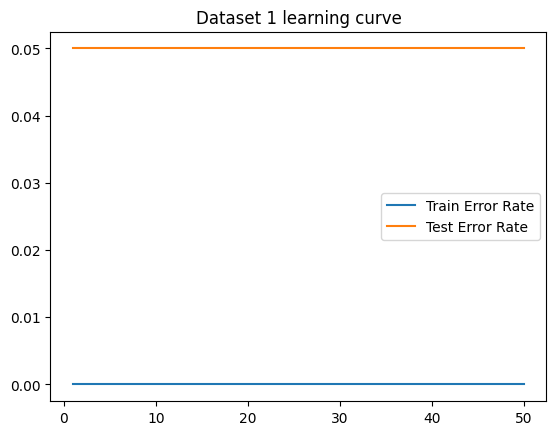

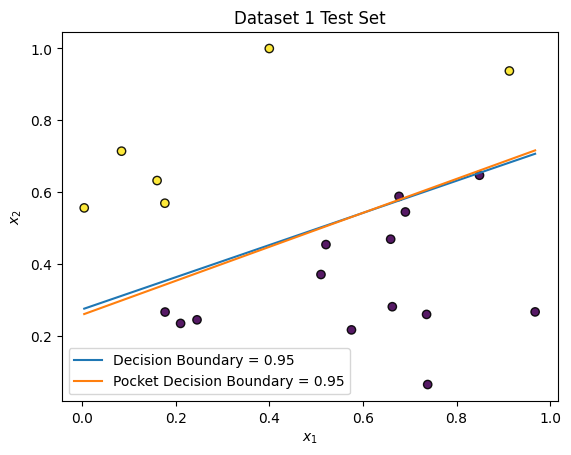

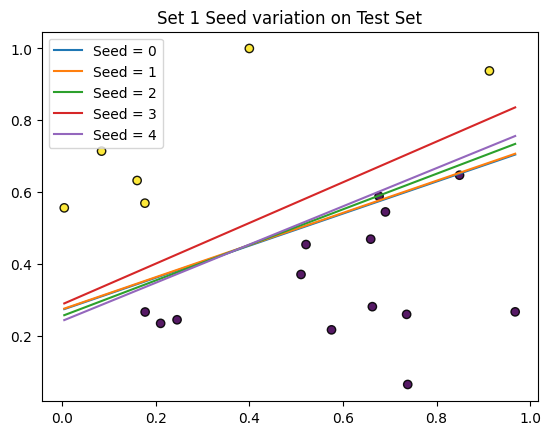

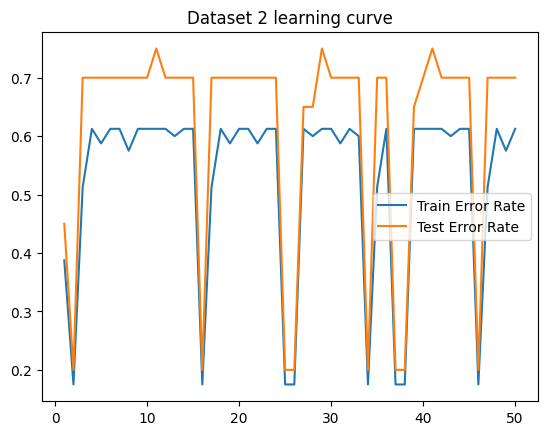

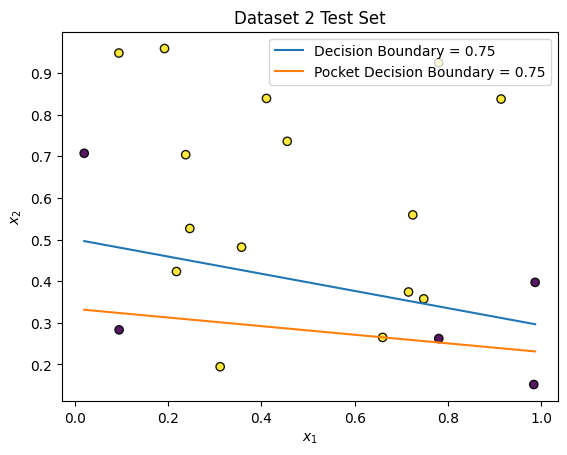

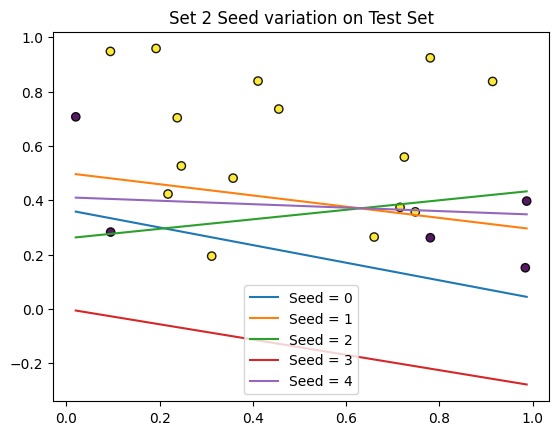

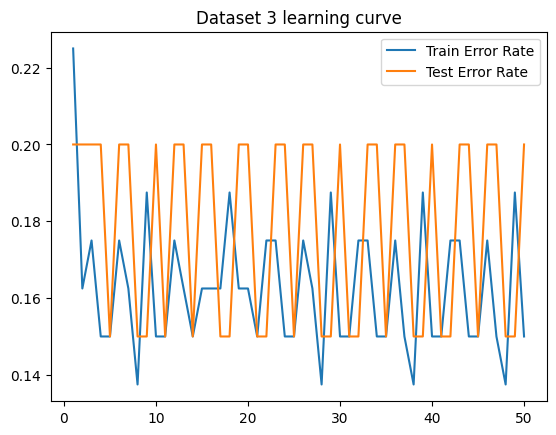

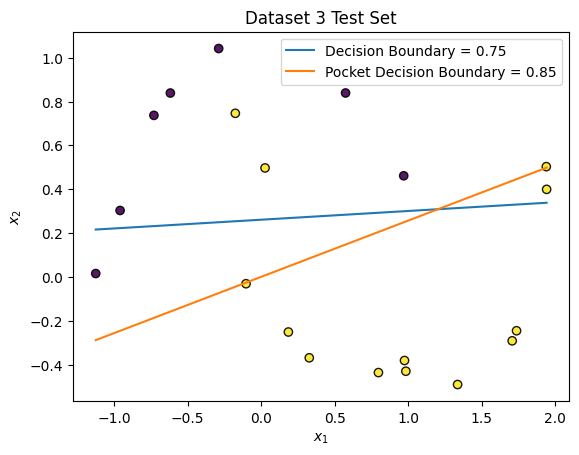

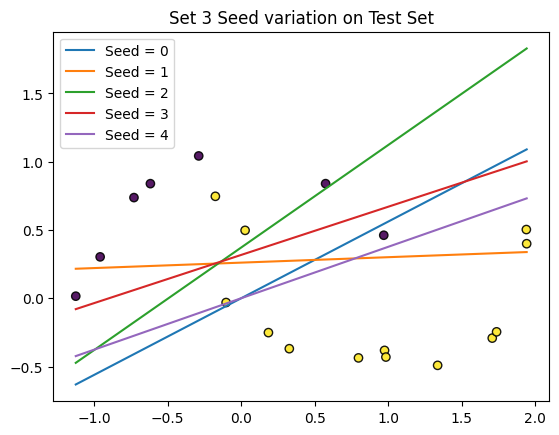

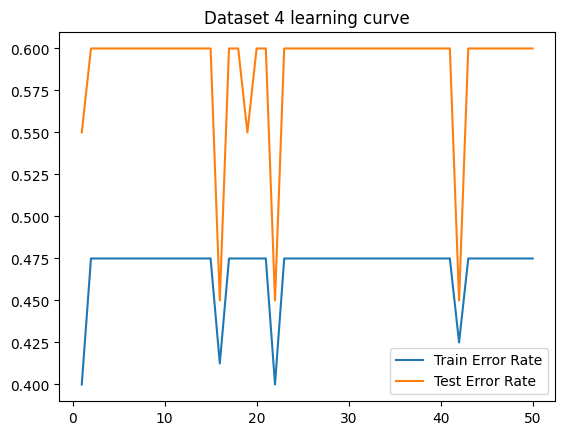

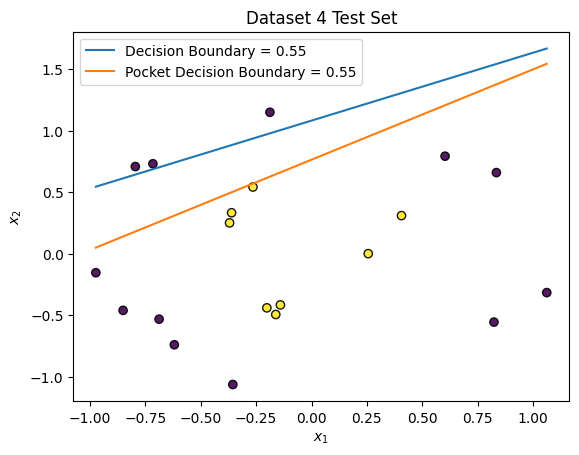

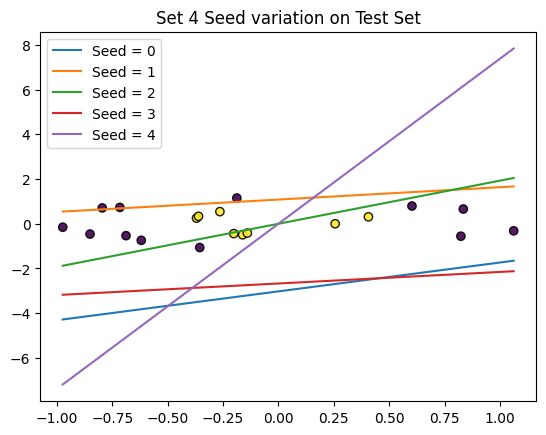

In [13]:
from sklearn.model_selection import train_test_split

for dataset_idx in range(4):
    if dataset_idx == 0:
        dataset_x = X1.copy();
        dataset_y = y1.copy();
        dataset_num = 1;
    elif dataset_idx == 1:
        dataset_x = X2.copy();
        dataset_y = y2.copy();
        dataset_num = 2;
    elif dataset_idx == 2:
        dataset_x = X3.copy();
        dataset_y = y3.copy();
        dataset_num = 3;
    elif dataset_idx == 3:
        dataset_x = X4.copy();
        dataset_y = y4.copy();
        dataset_num = 4;

    dataset_y[np.where(dataset_y==0)[0]] = -1

    print(dataset_num)
    X_train, X_test, y_train, y_test = train_test_split(dataset_x,dataset_y, test_size=0.20)
    
    clf = Perceptron(fit_intercept=True, eta0=1, random_state=1 )
    clf.fit(X_train,y_train)
    
    w = clf.coef_[0]
    w = np.array([clf.intercept_[0],w[0],w[1]])
    slope = -(w[1])/(w[2])
    inter = -w[0]/w[2]
    
    print(f"Training iterations: {clf.n_iter_}")
    
    n_epoch = 50
    epoch_score_train = np.zeros((n_epoch))
    epoch_score_test = np.zeros((n_epoch))
    clf_curve = Perceptron(fit_intercept=True, eta0=1,random_state=1 )
    for epoch_itr in range(n_epoch):
        clf_curve.partial_fit(X_train, y_train, classes=np.unique(y1_m1))
        epoch_score_train[epoch_itr] = 1-clf_curve.score(X_train, y_train)
        epoch_score_test[epoch_itr] = 1-clf_curve.score(X_test, y_test)
    
    plt.figure()
    plt.plot(np.linspace(1,n_epoch,n_epoch), epoch_score_train, label="Train Error Rate")
    plt.plot(np.linspace(1,n_epoch,n_epoch), epoch_score_test, label="Test Error Rate")
    plt.legend()
    plt.title(f"Dataset {dataset_num} learning curve")
    
    X_train_offset = np.append(np.zeros((X_train.shape[0],1))+1, X_train, axis=1)
    X_test_offset  = np.append(np.zeros((X_test.shape[0] ,1))+1, X_test,  axis=1)
    
    w_pocket = perceptron_sgd_pocket(X_train_offset, y_train)
    slope_pocket = -(w_pocket[1])/(w_pocket[2])
    inter_pocket = -w_pocket[0]/w_pocket[2]
    
    #print(X1_test_score)
    #print(y1_test)
    x_min = min(X_test[:,0])
    x_max = max(X_test[:,0])
    
    plt.figure()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.9, edgecolors='black')
    plt.plot( [x_min, x_max], inter + [slope*x_min,slope*x_max], label=f"Decision Boundary = {clf.score(X_test,y_test)}")
    plt.plot( [x_min, x_max], inter_pocket + [slope_pocket*x_min,slope_pocket*x_max], label=f"Pocket Decision Boundary = {perceptron_eval(X_test_offset, y_test, w_pocket)}")
    plt.legend()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f"Dataset {dataset_num} Test Set")
    
    plt.figure()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.9, edgecolors='black')
    # Test Different random seeds
    for seed in range(5):
        #np.random.seed(seed)
        clf = Perceptron(fit_intercept=True, eta0=1, random_state=seed)
        clf.fit(X_train,y_train)
        
        w = clf.coef_[0]
        w = np.array([clf.intercept_[0],w[0],w[1]])
        slope = -(w[1])/(w[2])
        inter = -w[0]/w[2]
        plt.plot( [x_min, x_max], inter + [slope*x_min,slope*x_max], label=f"Seed = {seed}")
    plt.title(f"Set {dataset_num} Seed variation on Test Set")
    plt.legend()

# Computer Exercise 2.2

[-0.6         2.59825196  0.47145123 -2.71095029  0.21193389  0.13197281]
0.0
1.2726661005794153


(-0.19731944345082258, 1.198450715558894)

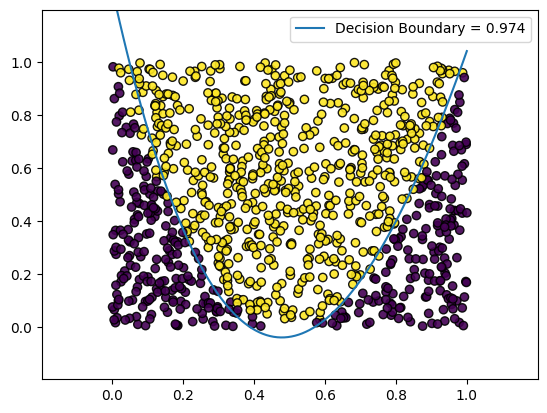

In [111]:
from sklearn.preprocessing import PolynomialFeatures
import math

N = 1000
X2 = np.random.rand(N,2)
y2 = (X2[:,1] > 4*(X2[:,0] -0.5)**2).astype(int)

poly2 = PolynomialFeatures( degree=2, include_bias=True )
X2_aug = poly2.fit_transform(X2)

clf = Perceptron(fit_intercept=False, eta0=0.1, tol=1E-6)
clf.fit(X2_aug,y2)
w = clf.coef_[0]
print(clf.coef_[0])
print(clf.intercept_[0])

x_min = min(X2[:,0])
x_max = max(X2[:,0])
y_min = min(X2[:,1])
y_max = max(X2[:,1])

N_G = 100
x_plt = np.linspace(x_min,x_max, N_G)
y_plt = np.zeros((N_G))
y_plt_1 = np.zeros((N_G))
y_plt_2 = np.zeros((N_G))

# https://www.wolframalpha.com/input?i=0+%3D+a+%2B+b*x+%2B+c*y+%2B+d*x%5E2+%2B+e*x*y+%2B+f*y%5E2+solve+for+y
for idx, x_val  in enumerate(x_plt):
    y_plt[idx] = -(w[0]+x_val*(w[1]+w[3]*x_val))/(w[2]+w[4]*x_val)
    
inter = -w[0]/w[2]
print(inter)
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], c=y2, alpha=0.9, edgecolors='black')
plt.plot( x_plt, y_plt, label=f"Decision Boundary = {clf.score(X2_aug,y2)}")
plt.legend()
scale = 0.2;
plt.xlim([x_min-scale,x_max+scale])
plt.ylim([y_min-scale,y_max+scale])

